# Installation & Libraries

In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import files
import os
import shutil

import math
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

## 1. Load Data

In [ ]:
# Prompt the user to upload the kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Move the kaggle.json file to the appropriate directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the file
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
!kaggle datasets download -d imsparsh/fma-free-music-archive-small-medium -p /content/ --unzip

100% 29.8G/29.8G [05:33<00:00, 167MB/s]
100% 29.8G/29.8G [05:33<00:00, 95.7MB/s]


In [ ]:
data_dir = '/content/fma_small/fma_small'  # Set the path to the fma_small directory
tracks_file = os.path.join(data_dir, 'tracks.csv')

## 2. Data Preprocessing

### Convert to Spectrograms (clipped audio processing)

In [ ]:
# import os
# import math
# import librosa
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the root path to the FMA dataset directory
# fma_dir = '/content/'

# # Load the tracks metadata
# tracks = pd.read_csv(os.path.join(fma_dir, 'fma_metadata', 'tracks.csv'), header=[0, 1], index_col=0)


# # Define the top-level genres you want to process
# top_level_genres = ['Pop','Hip-Hop','Rock','Experimental','Folk','Instrumental','Electronic','International']
# # Example: International, Instrumental, Experimental, Pop, Hip-Hop, Rock

# clip_duration = 3 # Duration of each clip in seconds

# # Prepare empty dictionary to store the Mel spectrograms
# mel_spectrograms = {}

# for top_level_genre in top_level_genres:
#     mel_spectrograms[top_level_genre] = []  # Initialize empty list for this top-level genre

# # Traverse through the audio files directory
# audio_dir = os.path.join(fma_dir, 'fma_small', 'fma_small')
# for folder in os.listdir(audio_dir):
#     folder_path = os.path.join(audio_dir, folder)
#     if not os.path.isdir(folder_path):
#         continue  # Skip non-folder files

#     for file in os.listdir(folder_path):
#         # Extract the track ID from the file name
#         track_id = int(os.path.splitext(file)[0])
#         genre_label = ('track', 'genre_top')

#         # Get the top-level genre for the current track
#         try:
#             top_level_genre = tracks.loc[track_id, genre_label]
#             # print(top_level_genre)
#         except IndexError:
#             continue

#         # Check if the top-level genre is in the specified genres list
#         if top_level_genre in top_level_genres:
#             # Construct the file path for the audio clip
#             file_path = os.path.join(folder_path, file)

#             try:
#                 # Load audio file
#                 y, sr = librosa.load(file_path)
#                 y, _ = librosa.effects.trim(y)

#                 # Calculate the number of samples in each clip
#                 clip_samples = int(sr * clip_duration)

#                 # Calculate the number of clips
#                 num_clips = math.ceil(len(y) / clip_samples)

#                 # Split the audio into clips
#                 for i in range(num_clips):
#                     start_sample = i * clip_samples
#                     end_sample = start_sample + clip_samples

#                     # Check if the end sample exceeds the length of the audio
#                     if end_sample > len(y):
#                         clip = np.pad(y[start_sample:], (0, end_sample - len(y)), mode='constant')
#                     else:
#                         clip = y[start_sample:end_sample]

#                     # Compute Mel spectrogram for the clip
#                     mel_spectrogram = librosa.feature.melspectrogram(y=clip, sr=sr)

#                     # Convert to log scale
#                     log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

#                     # Append log Mel spectrogram to list for this top-level genre
#                     mel_spectrograms[top_level_genre].append(log_mel_spectrogram)
#             except Exception as e:
#                 print(f"Could not process file {file_path}: {e}")

# # Plot spectrograms for each top-level genre
# for top_level_genre, spectrograms in mel_spectrograms.items():
#     plt.figure(figsize=(10, 6))
#     for i, spectrogram in enumerate(spectrograms[:5]):  # Plot only first 5 spectrograms for demonstration
#         plt.subplot(2, 3, i+1)
#         librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
#         plt.colorbar(format='%+2.0f dB')
#         plt.title(f"Top-Level Genre: {top_level_genre}")
#     plt.tight_layout()
#     plt.show()


### Convert to Spectrograms (full audio processing)

<ipython-input-8-74ad2929ca9a>:43: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Could not process file /content/fma_small/fma_small/099/099134.mp3: 


<ipython-input-8-74ad2929ca9a>:43: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Could not process file /content/fma_small/fma_small/133/133297.mp3: 


<ipython-input-8-74ad2929ca9a>:43: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-8-74ad2929ca9a>:43: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-8-74ad2929ca9a>:43: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarni

Could not process file /content/fma_small/fma_small/108/108925.mp3: 


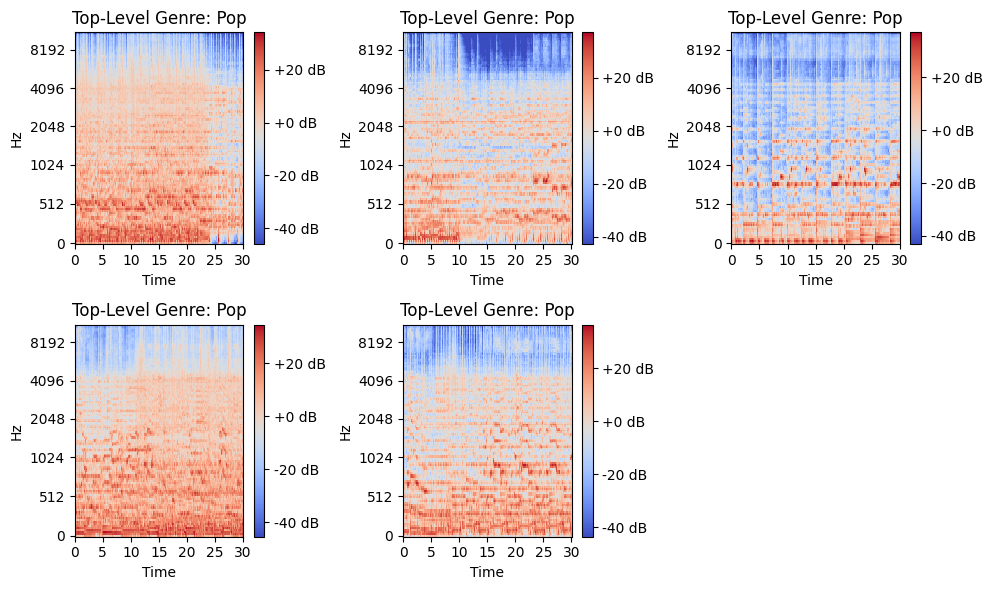

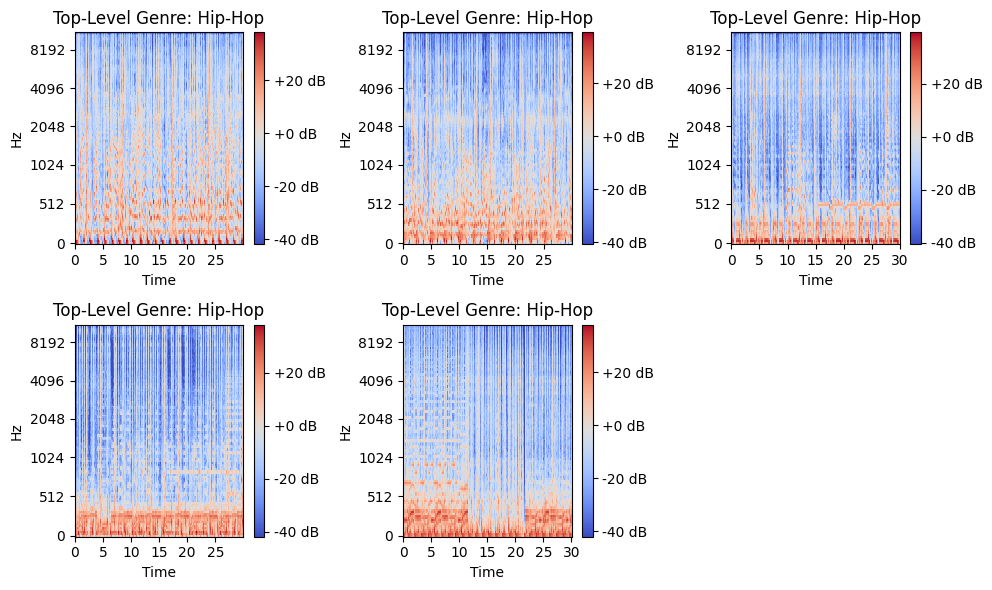

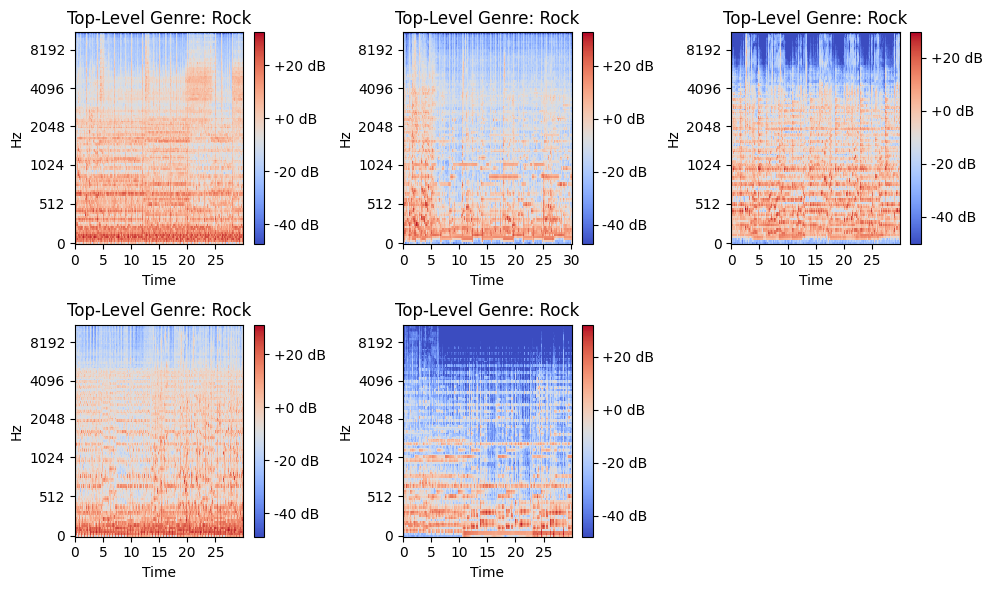

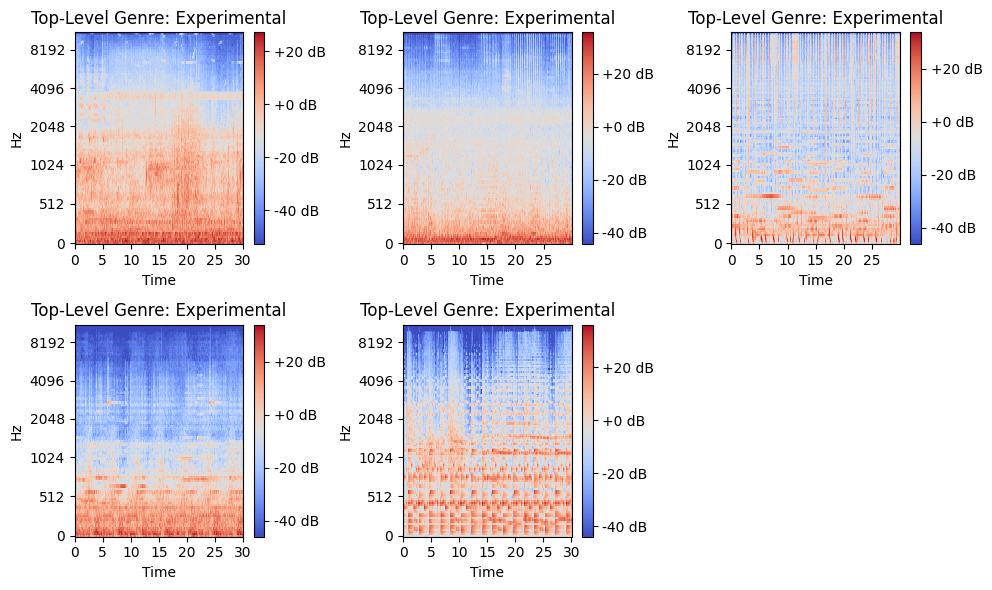

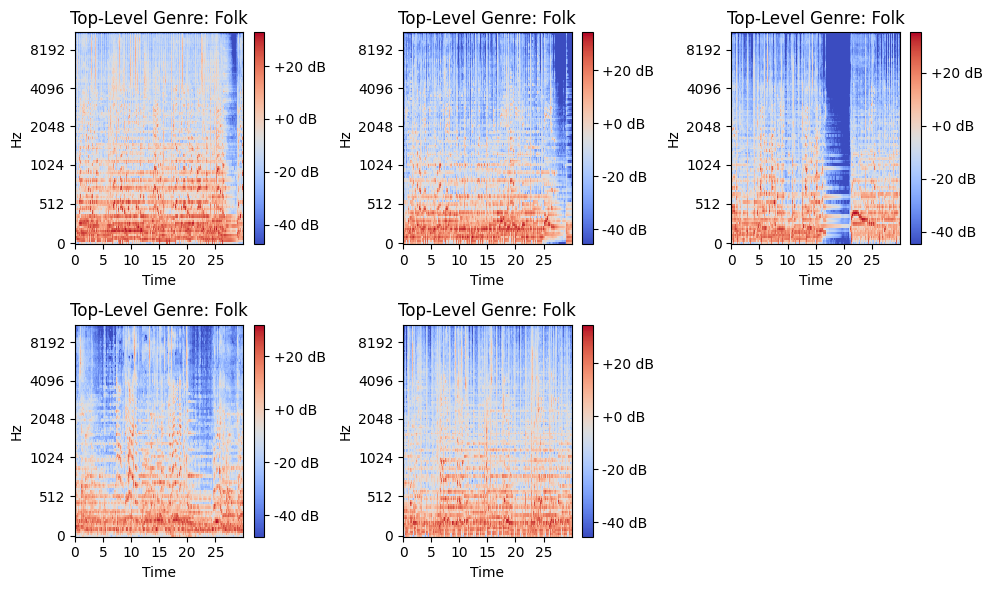

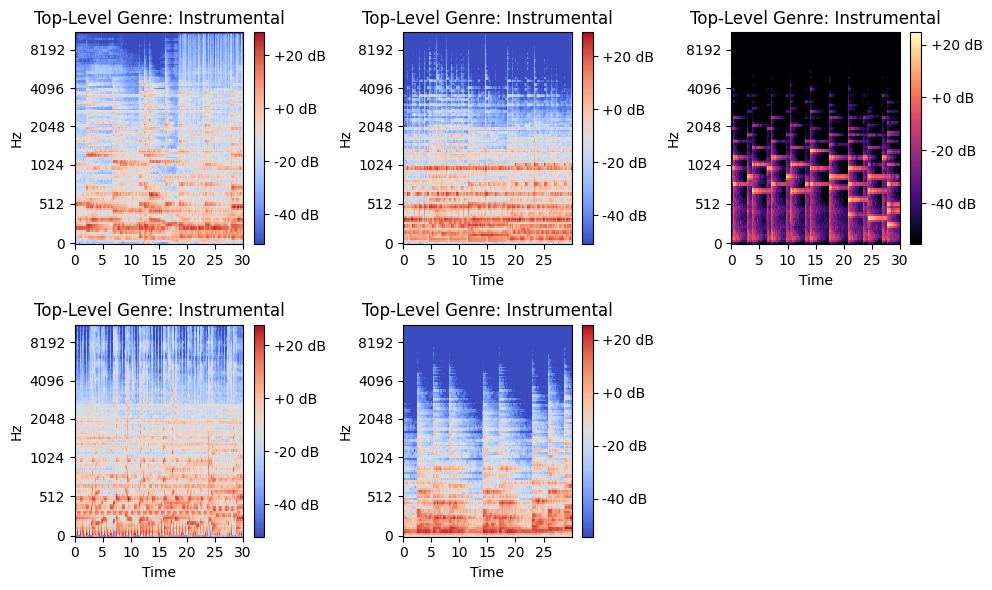

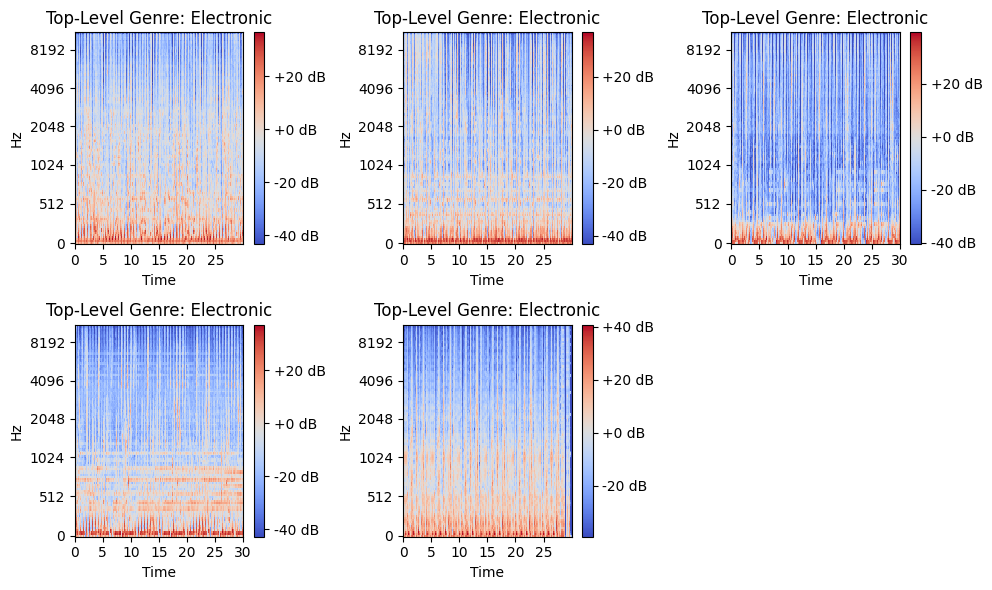

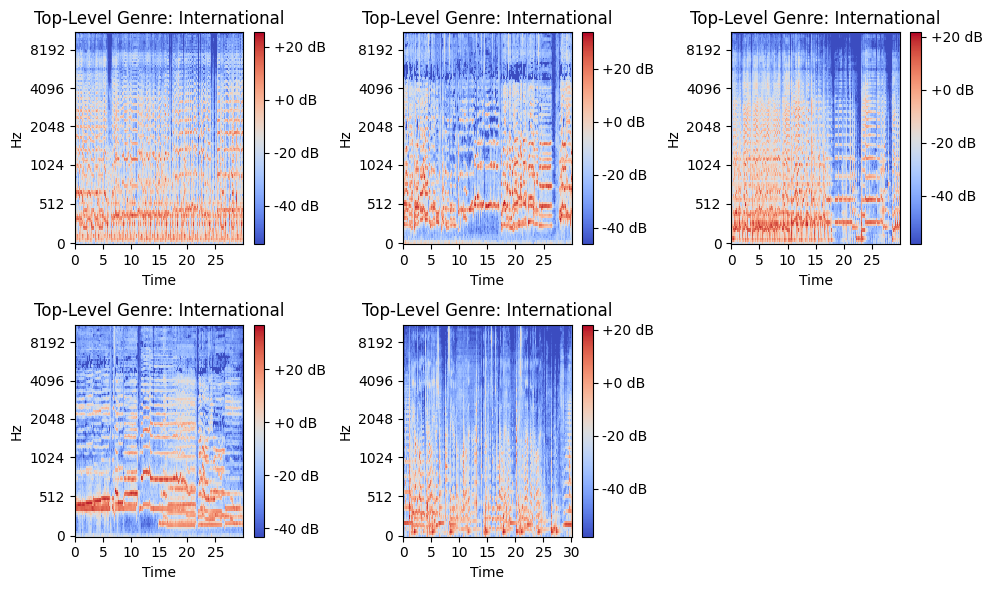

In [ ]:
# Define the root path to the FMA dataset directory
fma_dir = '/content/'

# Load the tracks metadata
tracks = pd.read_csv(os.path.join(fma_dir, 'fma_metadata', 'tracks.csv'), header=[0, 1], index_col=0)


# Define the top-level genres you want to process
top_level_genres = ['Pop','Hip-Hop','Rock','Experimental','Folk','Instrumental','Electronic','International']

# Prepare empty dictionary to store the Mel spectrograms
mel_spectrograms = {}

for top_level_genre in top_level_genres:
    mel_spectrograms[top_level_genre] = []  # Initialize empty list for this top-level genre

# Traverse through the audio files directory
audio_dir = os.path.join(fma_dir, 'fma_small', 'fma_small')
for folder in os.listdir(audio_dir):
    folder_path = os.path.join(audio_dir, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip non-folder files

    for file in os.listdir(folder_path):
        # Extract the track ID from the file name
        track_id = int(os.path.splitext(file)[0])
        genre_label = ('track', 'genre_top')

        # Get the top-level genre for the current track
        try:
            top_level_genre = tracks.loc[track_id, genre_label]
        except IndexError:
            continue

        # Check if the top-level genre is in the specified genres list
        if top_level_genre in top_level_genres:

            # Construct the file path for the audio clip
            file_path = os.path.join(folder_path, file)

            try:
                # Load audio file
                y, sr = librosa.load(file_path)
                y, _ = librosa.effects.trim(y)

                # Compute Mel spectrogram for the clip
                mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

                # Convert to log scale
                log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

                # Append log Mel spectrogram to list for this top-level genre
                mel_spectrograms[top_level_genre].append(log_mel_spectrogram)

            except Exception as e:
                print(f"Could not process file {file_path}: {e}")

# Plot spectrograms for each top-level genre
for top_level_genre, spectrograms in mel_spectrograms.items():
    plt.figure(figsize=(10, 6))
    for i, spectrogram in enumerate(spectrograms[:5]):  # Plot only first 5 spectrograms for demonstration
        plt.subplot(2, 3, i+1)
        librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Top-Level Genre: {top_level_genre}")
    plt.tight_layout()
    plt.show()

### Mel Spectrogram Resizing

In [ ]:
# Define target image dimensions
image_width = 64
image_height = 64
num_channels = 3

# Prepare empty dictionary to store converted spectrograms
converted_spectrograms = {}

# Convert spectrograms to image-like format
for label, spectrograms in mel_spectrograms.items():
    converted_spectrograms[label] = []  # Initialize empty list for this label
    for spectrogram in spectrograms:
        # Normalize the spectrogram to [0, 1]
        spectrogram_normalized = (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram))

        # Convert the spectrogram array to uint8 data type
        spectrogram_uint8 = (spectrogram_normalized * 255).astype(np.uint8)

        # Create a PIL image from the spectrogram array
        spectrogram_image = Image.fromarray(spectrogram_uint8)

        # Convert the grayscale image to RGB
        spectrogram_image_rgb = spectrogram_image.convert('RGB')

        # Resize the image
        image = spectrogram_image_rgb.resize((image_width, image_height))

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Normalize the pixel values to [0, 1]
        image_array_normalized = image_array / 255.0

        # Convert the array to a TensorFlow tensor
        tensor_image = tf.convert_to_tensor(image_array_normalized, dtype=tf.float32)

        # Append the converted tensor to the list for the current label
        converted_spectrograms[label].append(tensor_image)

<ipython-input-9-ead220d4de67>:14: RuntimeWarning: invalid value encountered in true_divide
  spectrogram_normalized = (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram))


### Assign X, Y variables

In [ ]:
# Prepare empty lists to store the spectrograms and labels
X = []
y = []

# Iterate over the mel spectrograms
for label, spectrograms in converted_spectrograms.items():
  # if label not in ['Electronic', 'Hip-Hop','Instrumental','Folk']:
    for spectrogram in spectrograms:
        X.append(spectrogram)
        y.append(label)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Perform label encoding
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y)

# Perform one-hot encoding
y_one_hot = to_categorical(y_label_encoded)

In [ ]:
X.shape

(7997, 64, 64, 3)

In [ ]:
y_one_hot.shape

(7997, 8)

# Build and Train Model

In [ ]:
# Define number of classes
num_classes = 8

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

# Create the CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Define learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # callback to stop training if validation loss doesn't improve in 5 epochs

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
history

Epoch 1/60
175/175 [==============================] - 29s 157ms/step - loss: 2.0139 - accuracy: 0.1863 - val_loss: 1.9688 - val_accuracy: 0.2346
Epoch 2/60
175/175 [==============================] - 27s 153ms/step - loss: 1.9098 - accuracy: 0.2612 - val_loss: 1.8919 - val_accuracy: 0.3025
Epoch 3/60
175/175 [==============================] - 27s 153ms/step - loss: 1.8529 - accuracy: 0.2971 - val_loss: 1.9045 - val_accuracy: 0.2842
Epoch 4/60
175/175 [==============================] - 27s 155ms/step - loss: 1.7835 - accuracy: 0.3316 - val_loss: 1.8350 - val_accuracy: 0.3088
Epoch 5/60
175/175 [==============================] - 27s 152ms/step - loss: 1.7222 - accuracy: 0.3600 - val_loss: 1.9404 - val_accuracy: 0.2625
Epoch 6/60
175/175 [==============================] - 26s 150ms/step - loss: 1.6863 - accuracy: 0.3738 - val_loss: 1.7350 - val_accuracy: 0.3567
Epoch 7/60
175/175 [==============================] - 27s 156ms/step - loss: 1.6431 - accuracy: 0.3965 - val_loss: 1.7345 - val_ac

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)       

# Plot Accuracy and Loss

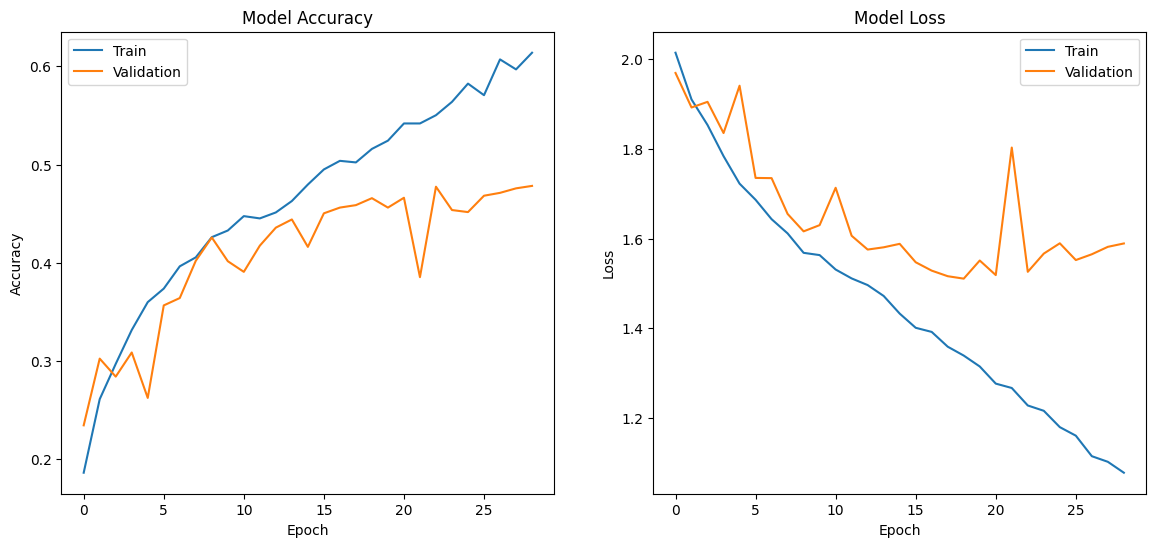

In [ ]:
# Plotting accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

# Plot Confusion Matrix

75/75 [==============================] - 3s 39ms/step


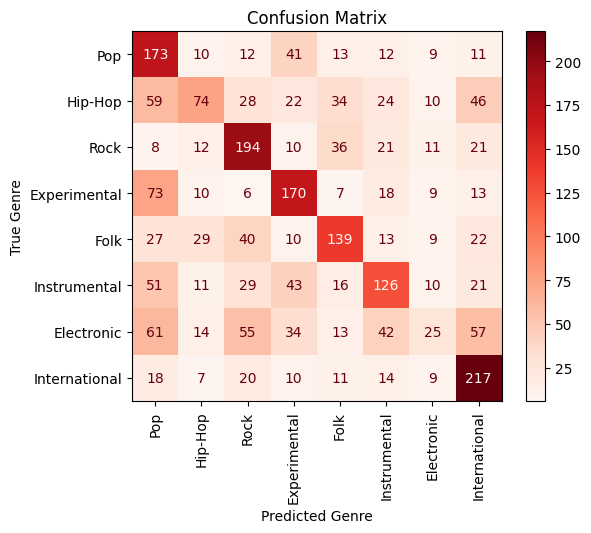

In [ ]:
# Assuming you have the model and the validation data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_level_genres)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')

# Rotate xticks vertically
plt.xticks(rotation='vertical')
plt.show()

# Classification Report

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=top_level_genres, zero_division=0)

# Print the classification report
print(report)

75/75 [==============================] - 2s 33ms/step
               precision    recall  f1-score   support

          Pop       0.37      0.62      0.46       281
      Hip-Hop       0.44      0.25      0.32       297
         Rock       0.51      0.62      0.56       313
 Experimental       0.50      0.56      0.53       306
         Folk       0.52      0.48      0.50       289
 Instrumental       0.47      0.41      0.44       307
   Electronic       0.27      0.08      0.13       301
International       0.53      0.71      0.61       306

     accuracy                           0.47      2400
    macro avg       0.45      0.47      0.44      2400
 weighted avg       0.45      0.47      0.44      2400

